In [44]:
import cv2
from matplotlib import pyplot as plt
from edge_detection import*
import os

In [45]:
test_path = r"BSDS500\data/images/test"
train_path = r"BSDS500\data\images\train"
validation_path = r"BSDS500\data\images\val"
ground_truth_test_path = r"BSDS500\data/images/ground_truth_test"

In [46]:
ground_truth_images_path = read_images(ground_truth_test_path)
ground_truth_test_images = []
for path in ground_truth_images_path:
    ground_truth_test_images.append(read_ground_truth_images(f"{ground_truth_test_path}/{path}"))

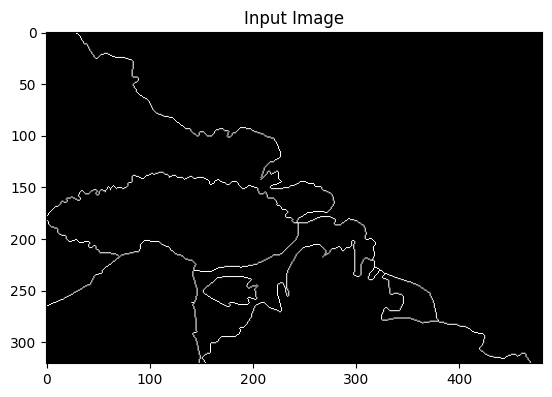

In [47]:
show_image(ground_truth_test_images[4])

In [59]:
cv_images = read_images_from_path(test_path)
sobel_cv_images3 = []
sobel_cv_images5 = []
sobel_cv_images7 = []
for cv_image in cv_images:
    sobel_image = perform_edge_detection(cv_image, ksize=1, threshold=100)
    sobel_cv_images3.append(sobel_image)
    sobel_image = perform_edge_detection(cv_image, ksize=5, threshold=255*16)
    sobel_cv_images5.append(sobel_image)
    sobel_image = perform_edge_detection(cv_image, ksize=7, threshold=100*255)
    sobel_cv_images7.append(sobel_image)


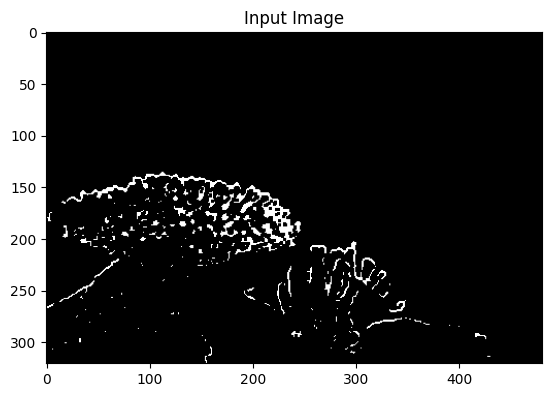

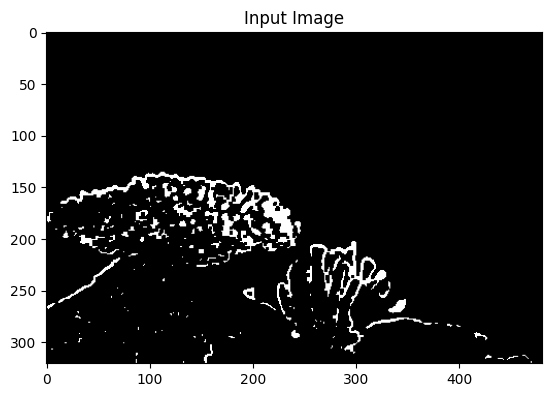

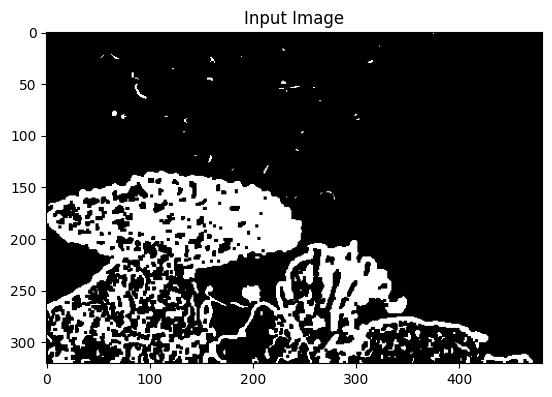

In [60]:
show_image(sobel_cv_images3[4])
show_image(sobel_cv_images5[4])
show_image(sobel_cv_images7[4])

In [61]:
import skimage.metrics
# Calculate evaluation metrics
mse3 = ((ground_truth_test_images[4] - sobel_cv_images3[4]) ** 2).mean()
mse5 = ((ground_truth_test_images[4] - sobel_cv_images5[4]) ** 2).mean()
mse7 = ((ground_truth_test_images[4] - sobel_cv_images7[4]) ** 2).mean()
print("MSE:", mse3, mse5,mse7)

MSE: 1614.3679445081314 2608.707909922863 11175.314667651117


In [ ]:
import cv2
import numpy as np

def evaluate_image(image, ground_truth, threshold):
  """Evaluates an image against a ground truth.

  Args:
    image: The image to evaluate.
    ground_truth: The ground truth for the image.
    threshold: The threshold value used for edge detection.

  Returns:
    A tuple of (accuracy, precision, recall, f1_score, threshold).
  """

  ground_truth_np = np.uint8(ground_truth)

  # Get the predictions from the thresholded image.
  _, predictions = cv2.connectedComponents(image)

  # Calculate the accuracy, precision, and recall.
  accuracy = np.sum(predictions == ground_truth_np) / predictions.size
  precision = np.sum(predictions == ground_truth_np) / np.sum(predictions)
  recall = np.sum(predictions == ground_truth_np) / np.sum(ground_truth_np)

  # Calculate the F1 score.
  f1_score = (2 * precision * recall) / (precision + recall)

  return accuracy, precision, recall, f1_score


In [ ]:
x = evaluate_image(ground_truth_test_images[4], sobel_cv_images[4],100)

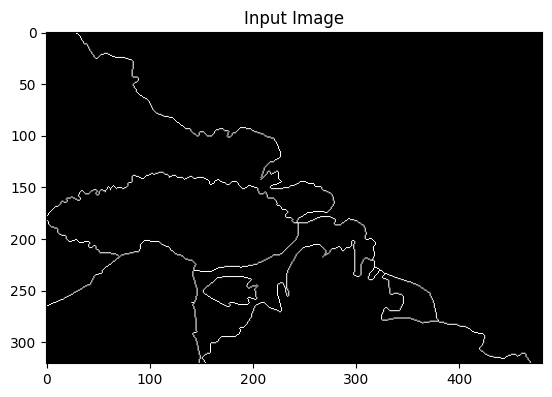

In [ ]:
show_image( ground_truth_test_images[4])

In [ ]:
y_true, y_pred=ground_truth_test_images[4],sobel_cv_images[4]
img_true, img_pred=ground_truth_test_images[4],sobel_cv_images[4]

In [ ]:
from skimage.metrics import structural_similarity as ssim

# img_true: ground truth image, img_pred: predicted image
score = ssim(img_true, img_pred, multichannel=True)


In [ ]:
score

0.8797959968080435

In [42]:
frames_list, filtered_frames_list = create_frames_from_video('flick.mp4' , sobel_threshold_value =1000*255, ksize =9)

In [43]:
show_video_from_frames(frames_list, filtered_frames_list)